In [1]:
import torch
from torch import nn

In [2]:
# Reminder Conv2d/ConvTranspose2d args: (in, out, kern, stride, padding)
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

    self.network = nn.Sequential(
      nn.ConvTranspose2d(60, 512, 15, 2, 0, bias=False),
      nn.BatchNorm2d(512),
      nn.ReLU(True),

      nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
      nn.BatchNorm2d(256),
      nn.ReLU(True),

      nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
      nn.BatchNorm2d(128),
      nn.ReLU(True),

      nn.ConvTranspose2d(128, 4, 4, 2, 1, bias=False),
      nn.Tanh()
    )

  def forward(self, x):
    return self.network(x)

In [3]:
G = Generator()
imgs = []
noise = torch.randn(89, 60, 1, 1)
with torch.no_grad():
    for i in range(0, 20):
        path = f'Models0-2000/{i*100}epochsG.pt'
        G.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
        imgs.append(G(noise))
        
    for i in range(0, 30, 3):
        path = f'Models2000-5000/{i*100}epochsG.pt'
        G.load_state_dict(torch.load(path, map_location=torch.device('cpu')))
        imgs.append(G(noise))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

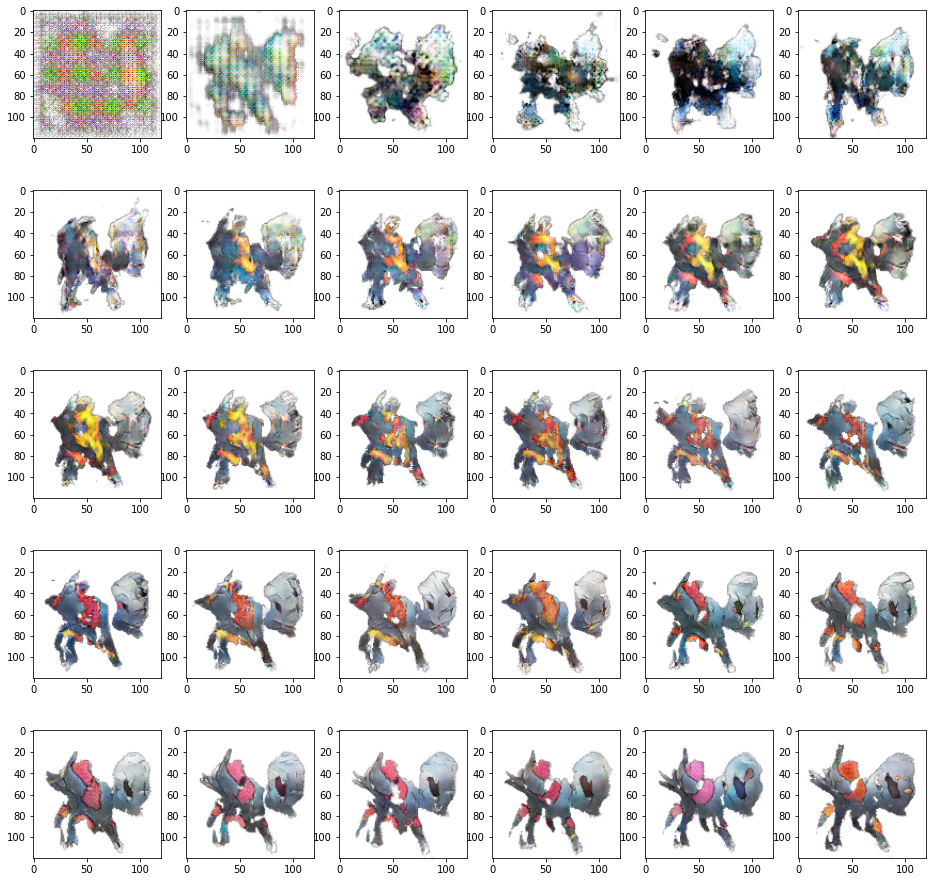

In [111]:
import matplotlib.pyplot as plt
with torch.no_grad():
    fig=plt.figure(figsize=(16, 16))
    for i, img in enumerate(imgs):
        fig.add_subplot(5, 6, i+1)
        plt.imshow(img[35].permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


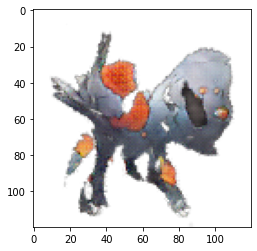

In [110]:
plt.imshow(imgs[29][35].permute(1, 2, 0))